In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
df=pd.read_table('C:\\Users\\Siddy\\Desktop\\occupancy_data\\datatraining.txt', sep=',')
df.dtypes
df.shape

(8143, 7)

In [2]:
df['date']=pd.to_datetime(df.date) #I have converted to datetime so we can use maths with datetime

In [3]:
ts=pd.to_datetime('2/2/2015')
df.reset_index(inplace=True)
del df['index']
df.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1


In [4]:
feature_cols=['Temperature', 'Humidity', 'Light', 'CO2']
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

In [5]:
import random
reservoir=[]
def reservoir_sample(dfo,size):
        for index, row in dfo.iterrows():
                    if index<=size:
                            reservoir.append(row)
                    elif index >= size and random.random() < size/float(index+1):
                            replace = random.randint(0,size-1)
                            reservoir[replace] = (row)
        return reservoir

In [11]:
df_test=pd.DataFrame()
max_size=len(df)
chunk_count=10
all_chunks=[]
nxt_chunks=[]
AccuScore=[]
PreScore=[]
RScore=[]
f1score=[]
i=0
j=1
chunk_size=int(round(max_size/chunk_count))
for i in range (chunk_count):
    idx_start=chunk_size*i
    idx_end=min(idx_start+chunk_size,max_size)
    nxt_idx_start=chunk_size*(i+1)
    nxt_idx_end=min(nxt_idx_start+chunk_size,max_size)
    all_chunks.append(df.iloc[idx_start:idx_end])
    nxt_chunks.append(df.iloc[nxt_idx_start:nxt_idx_end])
    df_sample=pd.DataFrame(reservoir_sample(all_chunks[i],5))
    df_test=nxt_chunks[i]
    print (df_sample.head(2))
    df1_train_x=df_sample[feature_cols]                           
    df1_train_y=df_sample.Occupancy
    logreg.fit(df1_train_x,df1_train_y)
    df1_test_x=df_test[feature_cols]
    df1_test_y=df_test.Occupancy
    y_pred=logreg.predict(df1_test_x)
    Ascore=metrics.accuracy_score(df1_test_y,y_pred)
    pscore=metrics.precision_score(df1_test_y,y_pred)
    rcscore=metrics.recall_score(df1_test_y,y_pred)
    fscore=metrics.f1_score(df1_test_y,y_pred)
    AccuScore.append(Ascore)
    PreScore.append(pscore)
    RScore.append(rcscore)
    f1score.append(fscore)
print('All done')


                  date  Temperature  Humidity  Light         CO2  \
80 2015-02-04 19:11:00       22.200     27.29    0.0  594.333333   
10 2015-02-04 18:01:00       23.075     27.15  419.0  690.250000   

    HumidityRatio  Occupancy  
80       0.004517          0  
10       0.004741          1  
                    date  Temperature  Humidity  Light          CO2  \
1548 2015-02-05 19:38:59    21.150000     19.65    0.0   520.000000   
1265 2015-02-05 14:55:59    22.426667     28.20  543.0  1066.333333   

      HumidityRatio  Occupancy  
1548       0.003043          0  
1265       0.004734          1  
                    date  Temperature  Humidity  Light          CO2  \
1548 2015-02-05 19:38:59    21.150000     19.65    0.0   520.000000   
1265 2015-02-05 14:55:59    22.426667     28.20  543.0  1066.333333   

      HumidityRatio  Occupancy  
1548       0.003043          0  
1265       0.004734          1  
                    date  Temperature  Humidity  Light          CO2  \
1548 

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


                    date  Temperature  Humidity  Light          CO2  \
3951 2015-02-07 11:42:00    22.700000      17.6  349.0   458.000000   
1265 2015-02-05 14:55:59    22.426667      28.2  543.0  1066.333333   

      HumidityRatio  Occupancy  
3951       0.002996          0  
1265       0.004734          1  
                    date  Temperature  Humidity  Light          CO2  \
3951 2015-02-07 11:42:00    22.700000      17.6  349.0   458.000000   
1265 2015-02-05 14:55:59    22.426667      28.2  543.0  1066.333333   

      HumidityRatio  Occupancy  
3951       0.002996          0  
1265       0.004734          1  
                    date  Temperature  Humidity  Light          CO2  \
3951 2015-02-07 11:42:00    22.700000      17.6  349.0   458.000000   
1265 2015-02-05 14:55:59    22.426667      28.2  543.0  1066.333333   

      HumidityRatio  Occupancy  
3951       0.002996          0  
1265       0.004734          1  
                    date  Temperature  Humidity  Light    CO2

In [9]:
print(AccuScore)
print(PreScore)
print(RScore)
print(f1score)
allchunkssizes=[0,814,1628,2442,3256,4070,4884,5698,6512,7326]

[0.92014742014742013, 0.9901719901719902, 0.98771498771498767, 0.6744471744471745, 0.9508599508599509, 0.88083538083538082, 1.0, 0.77027027027027029, 0.99631449631449631, 1.0]
[0.89368770764119598, 0.95375722543352603, 0.97679814385150809, 0.0, 0.0, 0.0, 0.0, 0.99150141643059486, 0.94444444444444442, 1.0]
[0.99814471243042668, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.65543071161048694, 1.0, 1.0]
[0.94303242769500428, 0.97633136094674555, 0.98826291079812201, 0.0, 0.0, 0.0, 0.0, 0.78917700112739575, 0.97142857142857142, 1.0]


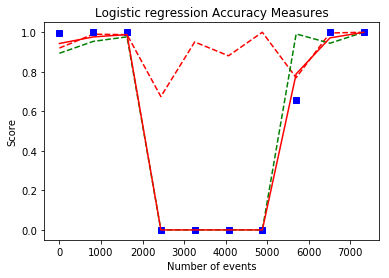

In [10]:
plt.plot(allchunkssizes,AccuScore,'r--')
plt.plot(allchunkssizes,PreScore,'g--')
plt.plot(allchunkssizes,RScore,'bs')
plt.plot(allchunkssizes,f1score,'r')
plt.title('Logistic regression Accuracy Measures')
plt.ylabel('Score')
plt.xlabel('Number of events')
plt.show()